## Laboratorium 1
### Wykonali: Adam Gawryś, Dawid Kleina

### Import bibliotek:

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

### Zadanie nr 1

Załadowanie pliku csv z danymi:

In [ ]:
data = pd.read_csv("../content/netflix_titles.csv")

a) Ilość wczytanych wierszy danych:

In [ ]:
len(data.index)

7787

b) Wymiar wczytanych danych (kolumny x indeksy)

In [ ]:
data.shape

(7787, 12)

c) Zlicz ilość wartość pustych (jeśli w są) w każdej z kolumn

In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Zadanie nr 2


Załadowanie danych z biblioteki Seaborn:

In [ ]:
data_titanic = sns.load_dataset('titanic')
data_titanic 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


a) Zlicz ile jest wartości pustych w zbiorze NaN:

In [ ]:
data_titanic.isna().sum().sum()

869

b) Zlicz ilość wartość pustych (null) w każdej kolumnie, a wynik zapisz w postaci sumy
skumulowanej:

In [ ]:
data_titanic.isnull().cumsum().sum().sum()

391442

c) Usuń te kolumny, jeśli takie istnieją dla których liczba wartości pustych jest większa
niż 30% wielkości pobranego zbioru danych:

In [ ]:
data_titanic = data_titanic.drop(data_titanic.columns[data_titanic.apply(lambda col: col.isnull().sum() > 0.3)], axis=1)

In [ ]:
data_titanic

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


d) Zamień dane kategoryczne w kolumnie sex {female,male} na wartości liczbowe {0,1}:

In [ ]:
data_titanic = data_titanic['sex'] = data_titanic['sex'].map({'male' : 1, 'female' : 0})

### Zadanie nr 3

Odszukaj profil o nazwie użytkownika: MikiKru. Oblicz statystykę języków programowania publikowanych w powyższym repozytorium, tj. jaki udział procentowy ma danych język programowania względem wszystkich repozytoriów użytkownika MikiKru. Wynik zaprezentuj ja pomocą wykresu kołowego:

In [ ]:
url1 = "https://api.github.com/repos/MikiKru/p2"
zad = pd.read_json(url1, lines = True)
print(zad.columns)
zad.shape
print(zad.language)

Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'forks_url', 'keys_url',
       'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url',
       'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url',
       'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url',
       'languages_url', 'stargazers_url', 'contributors_url',
       'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url',
       'comments_url', 'issue_comment_url', 'contents_url', 'compare_url',
       'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url',
       'milestones_url', 'notifications_url', 'labels_url', 'releases_url',
       'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url',
       'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size',
       'stargazers_count', 'watchers_count', 'language', 'has_issues',
       'has_projects', 'has_downloads', 'has_wiki', 'has

In [ ]:
url = "https://api.github.com/users/MikiKru/repos?per_page=110"
repo = pd.read_json(url, lines = False)
print(repo.language)
repo.language.to_csv("jezyki", index=False, header=True)

0     Python
1       None
2     Python
3       Java
4     Python
       ...  
95      Java
96      None
97      None
98    Python
99      None
Name: language, Length: 100, dtype: object


In [ ]:
repo.to_csv("statystyka", index=False, header=True)
repo.shape

(100, 73)

In [ ]:
lan = repo['language'].value_counts()

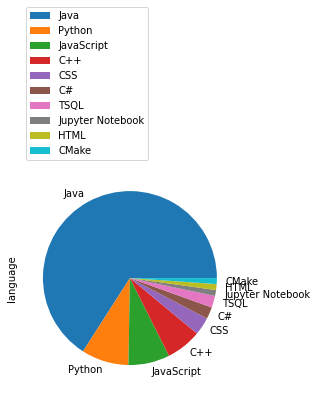

In [ ]:
lan.plot(kind='pie')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102))

plt.show()

### Zadanie 4

Wykorzystując biblioteki Requests oraz BeautifulSoup pobierz informacje o temperaturze w
dniu wykonywania żądania oraz prognozę temperatury na kolejny dzień (dzień / noc):

In [ ]:
tem = requests.get('https://pogoda.interia.pl/prognoza-szczegolowa-mirotki,cId,21515')
html = BeautifulSoup(tem.content, 'html.parser')

tem1 = requests.get('https://pogoda.interia.pl/prognoza-dlugoterminowa-mirotki,cId,21515')
html1 = BeautifulSoup(tem1.content, 'html.parser')

date1 = 'weather-forecast-hbh-day-labelRight'
day1 = html.find("span", attrs={'class' : date1})
hour1 = 'weather-currently-info-item-time'
day2 = html.find("span", attrs={'class' : hour1})
print("Dzień: " + str(day1).replace('<span class="weather-forecast-hbh-day-labelRight">',"").replace("</span>","") + " " + str(day2).replace('<span class="weather-currently-info-item-time">',"").replace("</span>",""))

dzis = 'weather-currently-temp-strict'
temperature_now = html.find("div", attrs={'class' : dzis})
print("Dzisiaj: " + str(temperature_now).replace('<div class="weather-currently-temp-strict">',"").replace("</div>",""))

jutro_dzien = 'weather-currently-middle-forecast-temperature-max'
temperature_tom_d = html1.find("span", attrs={'class' : jutro_dzien}).get_text()
jutro_noc = 'weather-currently-middle-forecast-temperature-min'
temperature_tom_n = html1.find("span", attrs={'class' : jutro_noc}).get_text()
print("Jutro: " + str(temperature_tom_d).replace('<span class="weather-currently-middle-forecast-temperature-max">',"").replace("</span>","") + "/" + str(temperature_tom_n).replace('<span class="weather-currently-middle-forecast-temperature-min">',"").replace("</span>",""))


Dzień: Sobota, 13 Marca 11:35
Dzisiaj: 6°C
Jutro: 5°C/0°C


### Wnioski

Same labolatorium przebiegło sprawnie. Było bardzo dobrze wytłumaczone, krok po kroku jak co robić. Zadania to idealna powtórka tego co już mieliśmy oraz idealny sposób na naukę nowych, nieznanych rzeczy. Nie wiedzieliśmy, że w Pythonie możemy poruszać się po stronach internetowych i za jego pomocą wyciągać jakieś dane. Sam ten motym jest przydatny i na pewno znajdzie dla nas zastosowanie. 